In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import func4behav as fb
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [18]:
compare_objects = ["RT mean shorten %"]# , "RT std decrease"]

In [19]:
behavior_compare, experiment = fb.create_allsubs_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(i)
    behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)


In [20]:
behavior_compare

,subject id,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
0,1,1,before,2,1,1,0.5,1,1,0.27437
1,1,1,before,2,-1,1,1.0,-1,1,0.21226
2,1,1,before,1,-1,-1,0.5,1,1,0.40884
3,1,1,before,1,-1,-1,0.5,1,1,0.22220
4,1,1,before,1,1,1,1.0,1,1,0.19879
...,...,...,...,...,...,...,...,...,...,...
4315,18,1,before,2,1,1,0.5,1,1,0.24780
4316,18,1,before,2,-1,-1,1.0,1,1,0.19268
4317,18,1,before,2,-1,1,1.0,-1,1,0.19498
4318,18,1,before,2,1,-1,1.0,-1,1,0.17280


In [21]:
behavior_before.iloc[0]

trial               1.00000
type                2.00000
cue                 1.00000
valid               1.00000
ICS                 0.50000
stimulus side       1.00000
stimulus x       1292.00000
stimulus y       -220.00000
response            1.00000
reaction time       0.27437
Name: 0, dtype: float64

In [22]:
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

KeyError: "['trials_before', 'trials_after'] not found in axis"

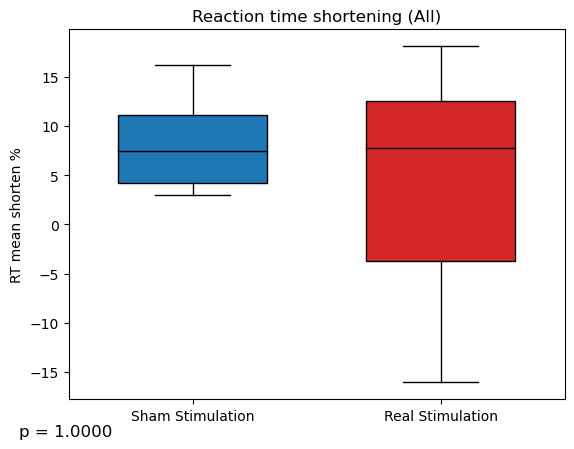

In [ ]:
# box plot of RT difference
# compare_objects = ["RT mean shorten %", "RT std decrease"]
for compare_object in compare_objects:
    watch = 'All'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()